<a href="https://colab.research.google.com/github/Ajalyst/Ajay-Kumar-/blob/main/TRIP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.cluster import KMeans, DBSCAN
import umap # use 'pip install umap-learn' or 'conda install -c conda-forge umap-learn'

In [ ]:
# Importing dataset and examining it
dataset = pd.read_csv("/content/tripadvisor_review.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

  User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1        0.93         1.8        2.29        0.62        0.80   
1  User 2        1.02         2.2        2.66        0.64        1.42   
2  User 3        1.22         0.8        0.54        0.53        0.24   
3  User 4        0.45         1.8        0.29        0.57        0.46   
4  User 5        0.51         1.2        1.18        0.57        1.54   

   Category 6  Category 7  Category 8  Category 9  Category 10  
0        2.42        3.19        2.79        1.82         2.42  
1        3.18        3.21        2.63        1.86         2.32  
2        1.54        3.18        2.80        1.31         2.50  
3        1.52        3.18        2.96        1.57         2.86  
4        2.02        3.18        2.78        1.18         2.54  
(980, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------   

In [ ]:
# Defining feature set
X = dataset.drop(['User ID'], axis = 1) # Features
Y = dataset['User ID']
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(980, 10)


In [ ]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [ ]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

ids = list(dataset['User ID'])

data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                                text=[f'User_ID: {a}' for a in ids],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()

Variance explained by each of the n_components:  [0.29775044 0.1262794 ]
Total variance explained by the n_components:  0.42402983746016876


In [ ]:
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_components = 2, n_neighbors=5, min_dist=0.1)
x_umap = u.fit_transform(X_scaled)

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                                text=[f'User_ID: {a}' for a in ids],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# Labelling clusters using KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x_umap)
ids = list(dataset['User ID'])
labels = list(kmeans.labels_)
data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'User_ID: {a}' for a in ids],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

dataset['User ID'] = kmeans.labels_
dataset.to_csv("User ID.csv", index=False)
print(dataset['User ID'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



User ID
1    328
3    228
0    189
2    183
4     52
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

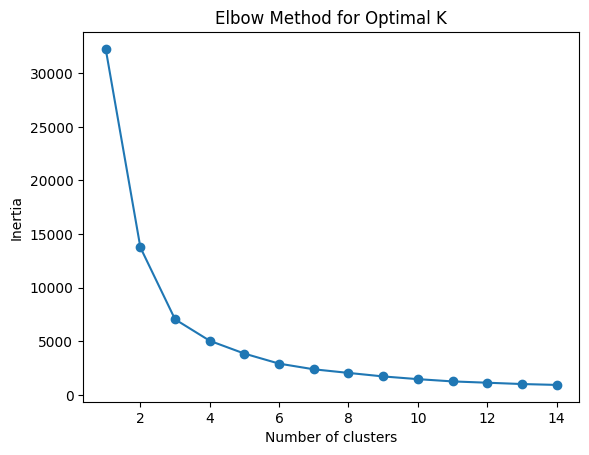

In [ ]:
### ELBOW METHOD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize a list to store inertia values for different k
inertia = []

# Define a range of k values to try
k_range = range(1, 15)  # You can adjust the range as needed

# Fit KMeans for each value of k and calculate inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


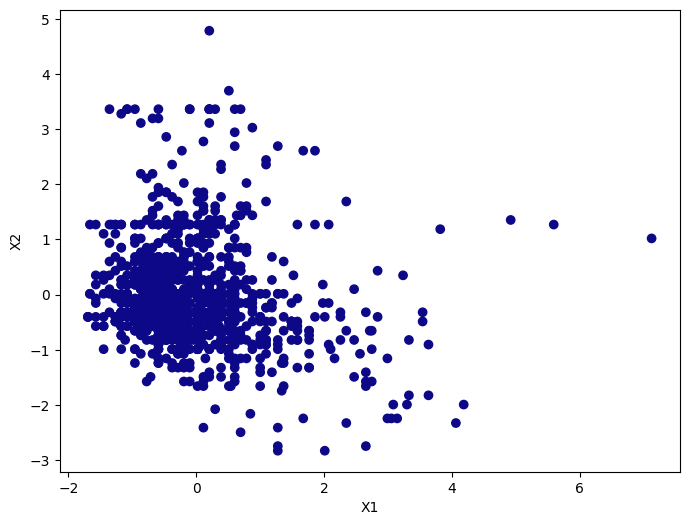

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_, cmap='plasma')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()